# Лабораторная работа 1.4. 
## Приближённое решение уравнений итерационными методами.

---

Студент: **Шагимарданов Владислав**

Группа: **РК4-92**

Вариант(по журналу): 7

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def func_x(x):
  """
  Возвращаем значение искомой функции при вводимой переменной
  """
  return math.exp(-x) - x

In [ ]:
# Создадим два списка для построения графика
# Лист переменных х
xlist = list(np.arange(-10, 10, .1))
# Лист со значениями функции при этих переменных
ylist = list(map(func_x, xlist))

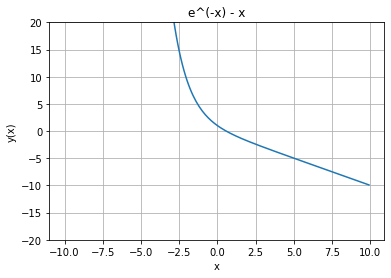

In [ ]:
# Нарисуем график
plt.plot(xlist, ylist)
plt.ylim(-20, 20)
plt.grid()
plt.title('e^(-x) - x')
plt.xlabel('x')
plt.ylabel('y(x)');

Функция, полученная из исходного уравнения, выпуклая при всех значениях x(посчитал в уме производную, она всегда отрицательная)

Это означает, что наше уравнение имеет один корень, так как искомая функция пересекает ось х один раз .

## Метод половинного деления


In [ ]:
def halving(x_left, x_right, er = 1e-6):
  """
  Функция, осуществляющая поиск корня методом половинного деления в ззаданном промежутке
  """
  # Ставим счетчик на ноль
  i = 0

  # Проверяем промежуток на различие знаков значений функции на нём
  if func_x(x_left) / func_x(x_right) > 0:
    return ('Корней в заданном промежутке не найдено')
  else:
    while abs(x_right - x_left) > er:
      # Счет итераций
      i += 1
      # Ищем середину 
      x_half = (x_right + x_left) / 2
      # Если левая половина разнознаковая, то корень в этой стороне и следует назначить новые границы
      if func_x(x_half) / func_x(x_left) < 0:
        x_right = x_half
      # Если правая половина -//-
      else:
        x_left = x_half
    # Выводим результат
    print('X =', x_half)
    print('Количество итераций для нахождения корня:', i)

In [ ]:
# Найдем решение
halving(-15, 5)

X = 0.5671435594558716
Количество итераций для нахождения корня: 25


## Метод секущих

In [ ]:
def secant_method(x_left, x_right, er = 1e-6):
  """
  Функция, осуществляющая поиск корня методом секущих(хорд)
  """
  # Счетчик итераций
  i = 0

  # Проверка промежутка на наличие корней
  if func_x(x_left) / func_x(x_right) > 0:
    return ('Корней в заданном промежутке не найдено')
  else:
    # Находим первое приближение
    x_new = x_right - (x_right - x_left) * func_x(x_right) / (func_x(x_right) - func_x(x_left))
    while abs(func_x(x_new)) > er:
      # Счет итераций
      i += 1
      # Условие ненужное для моего варианта, но исключающее возможность проскочить корень
      if func_x(x_new) / func_x(x_left) < 0:
        x_right = x_new
        # Последующее приближение
        x_new = x_right - (x_right - x_left) * func_x(x_right) / (func_x(x_right) - func_x(x_left))
      else:
        x_left = x_new
        # Последующее приближение
        x_new = x_right - (x_right - x_left) * func_x(x_right) / (func_x(x_right) - func_x(x_left))
    
    # Вывод результата
    print('X =', x_new)
    print('Количество итераций для нахождения корня:', i)

In [ ]:
# И наше решение
secant_method(0, 10)

X = 0.5671439067736868
Количество итераций для нахождения корня: 6
